# Wrangling Citi Bike Dataset
I'm going to assess the citi bike dataset to determine if I am dealing with missing values, understanding the types of data that I am dealing with, and whether any action needs to be taken to clean the data before diving into the data story. One of the challenges with this dataset is that, while each .csv file has the same data, some files have capitalized column headers while others don't. I've assessed and determined that the columns appear in the same order for each type, so I will specify the column names for each imported .csv files to avoid this confusion.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Specify columns to use
columns = ['bikeid', 'birth year', 'end station id', 
           'end station latitude', 'end station longitude', 'end station name',
           'gender', 'start station id', 'start station latitude', 'start station longitude',
           'start station name', 'starttime', 'stoptime', 'tripduration', 'usertype']

# use your path
path = r'/Users/vincent_zaballa/Springboard_Assignments/capstone_proj_2/CITI_BIKE/2016_data' 
all_files = glob.glob(os.path.join(path, "*.csv"))

# Appending all imported dataframes to empty df
frame = pd.DataFrame()
list_ = []
for file_ in all_files:
    df = pd.read_csv(file_, index_col=None, header=0)
    list_.append(df)
bike_df = pd.concat(list_)
bike_df.head()

,Bike ID,Birth Year,End Station ID,End Station Latitude,End Station Longitude,End Station Name,Gender,Start Station ID,Start Station Latitude,Start Station Longitude,...,end station name,gender,start station id,start station latitude,start station longitude,start station name,starttime,stoptime,tripduration,usertype
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,South End Ave & Liberty St,1.0,268.0,40.719105,-73.999733,Howard St & Centre St,1/1/2016 00:00:41,1/1/2016 00:16:04,923.0,Subscriber
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Broadway & W 32 St,1.0,476.0,40.743943,-73.979661,E 31 St & 3 Ave,1/1/2016 00:00:45,1/1/2016 00:07:04,379.0,Subscriber
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Greenwich Ave & 8 Ave,2.0,489.0,40.750664,-74.001768,10 Ave & W 28 St,1/1/2016 00:00:48,1/1/2016 00:10:37,589.0,Subscriber
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,South End Ave & Liberty St,2.0,268.0,40.719105,-73.999733,Howard St & Centre St,1/1/2016 00:01:06,1/1/2016 00:15:56,889.0,Subscriber
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Central Park S & 6 Ave,1.0,2006.0,40.765909,-73.976342,Central Park S & 6 Ave,1/1/2016 00:01:12,1/1/2016 00:25:52,1480.0,Subscriber


In [3]:
bike_df.dtypes

Bike ID                    float64
Birth Year                 float64
End Station ID             float64
End Station Latitude       float64
End Station Longitude      float64
End Station Name            object
Gender                     float64
Start Station ID           float64
Start Station Latitude     float64
Start Station Longitude    float64
Start Station Name          object
Start Time                  object
Stop Time                   object
Trip Duration              float64
User Type                   object
bikeid                     float64
birth year                 float64
end station id             float64
end station latitude       float64
end station longitude      float64
end station name            object
gender                     float64
start station id           float64
start station latitude     float64
start station longitude    float64
start station name          object
starttime                   object
stoptime                    object
tripduration        

After appending the multiple csv files together, it seems that some have the letters capitalized and others do not. I attemtempted to use the column names on import within the read_csv() method, but that resulted in some of the columns having mixed data types, for example, the birth year column was mixed with the starttime column. We can see here that there are different ways of saying the same thing, not just capitalization differences. That said, I'll match the column names to their appropriate name, then merge the identical columns.

In [4]:
bike_df.columns = columns + bike_df.columns[15:].tolist()

To simplify things, I'll simply create a new dataframe for each one and the merge using pandas. This is much easier than using a custom apply function, and probably faster (apply functions can be slow!).

In [5]:
right_df = bike_df[bike_df.iloc[:,0].notnull() == False]
left_df = bike_df[bike_df.iloc[:,0].notnull() == True]
right_df = right_df.dropna(axis=1, how='all')
left_df = left_df.dropna(axis=1, how='all')

In [6]:
# Need to convert two different format dfs to timestamp beforehand to speed things up MASSIVELY
right_df.starttime = pd.to_datetime(right_df.starttime, format='%m/%d/%Y %H:%M:%S')
right_df.stoptime = pd.to_datetime(right_df.stoptime, format='%m/%d/%Y %H:%M:%S')
right_df.head()

,bikeid,birth year,end station id,end station latitude,end station longitude,end station name,gender,start station id,start station latitude,start station longitude,start station name,starttime,stoptime,tripduration,usertype
0,22285.0,1958.0,3002.0,40.711512,-74.015756,South End Ave & Liberty St,1.0,268.0,40.719105,-73.999733,Howard St & Centre St,2016-01-01 00:00:41,2016-01-01 00:16:04,923.0,Subscriber
1,17827.0,1969.0,498.0,40.748549,-73.988084,Broadway & W 32 St,1.0,476.0,40.743943,-73.979661,E 31 St & 3 Ave,2016-01-01 00:00:45,2016-01-01 00:07:04,379.0,Subscriber
2,21997.0,1982.0,284.0,40.739017,-74.002638,Greenwich Ave & 8 Ave,2.0,489.0,40.750664,-74.001768,10 Ave & W 28 St,2016-01-01 00:00:48,2016-01-01 00:10:37,589.0,Subscriber
3,22794.0,1961.0,3002.0,40.711512,-74.015756,South End Ave & Liberty St,2.0,268.0,40.719105,-73.999733,Howard St & Centre St,2016-01-01 00:01:06,2016-01-01 00:15:56,889.0,Subscriber
4,14562.0,1952.0,2006.0,40.765909,-73.976342,Central Park S & 6 Ave,1.0,2006.0,40.765909,-73.976342,Central Park S & 6 Ave,2016-01-01 00:01:12,2016-01-01 00:25:52,1480.0,Subscriber


In [7]:
left_df.starttime = pd.to_datetime(left_df.starttime, format='%Y-%m-%d %H:%M:%S')
left_df.stoptime = pd.to_datetime(left_df.stoptime, format='%Y-%m-%d %H:%M:%S')
left_df.head()

,bikeid,birth year,end station id,end station latitude,end station longitude,end station name,gender,start station id,start station latitude,start station longitude,start station name,starttime,stoptime,tripduration,usertype
0,25254.0,1992.0,3077.0,40.708771,-73.950953,Stagg St & Union Ave,1.0,471.0,40.712868,-73.956981,Grand St & Havemeyer St,2016-10-01 00:00:07,2016-10-01 00:05:35,328.0,Subscriber
1,17810.0,1988.0,3140.0,40.771404,-73.953517,1 Ave & E 78 St,2.0,3147.0,40.778012,-73.954071,E 85 St & 3 Ave,2016-10-01 00:00:11,2016-10-01 00:06:49,398.0,Subscriber
2,20940.0,1965.0,470.0,40.743453,-74.000040,W 20 St & 8 Ave,1.0,345.0,40.736494,-73.997044,W 13 St & 6 Ave,2016-10-01 00:00:14,2016-10-01 00:07:25,430.0,Subscriber
3,19086.0,1993.0,3357.0,40.800836,-73.966449,W 106 St & Amsterdam Ave,1.0,3307.0,40.794165,-73.974124,West End Ave & W 94 St,2016-10-01 00:00:21,2016-10-01 00:06:12,351.0,Subscriber
4,26502.0,1991.0,3323.0,40.798186,-73.960591,W 106 St & Central Park West,1.0,3428.0,40.740983,-74.001702,8 Ave & W 16 St,2016-10-01 00:00:21,2016-10-01 00:45:15,2693.0,Subscriber


In [8]:
frames = [right_df, left_df]
bike_df = pd.concat(frames, axis=0)

In [9]:
bike_df.head()

,bikeid,birth year,end station id,end station latitude,end station longitude,end station name,gender,start station id,start station latitude,start station longitude,start station name,starttime,stoptime,tripduration,usertype
0,22285.0,1958.0,3002.0,40.711512,-74.015756,South End Ave & Liberty St,1.0,268.0,40.719105,-73.999733,Howard St & Centre St,2016-01-01 00:00:41,2016-01-01 00:16:04,923.0,Subscriber
1,17827.0,1969.0,498.0,40.748549,-73.988084,Broadway & W 32 St,1.0,476.0,40.743943,-73.979661,E 31 St & 3 Ave,2016-01-01 00:00:45,2016-01-01 00:07:04,379.0,Subscriber
2,21997.0,1982.0,284.0,40.739017,-74.002638,Greenwich Ave & 8 Ave,2.0,489.0,40.750664,-74.001768,10 Ave & W 28 St,2016-01-01 00:00:48,2016-01-01 00:10:37,589.0,Subscriber
3,22794.0,1961.0,3002.0,40.711512,-74.015756,South End Ave & Liberty St,2.0,268.0,40.719105,-73.999733,Howard St & Centre St,2016-01-01 00:01:06,2016-01-01 00:15:56,889.0,Subscriber
4,14562.0,1952.0,2006.0,40.765909,-73.976342,Central Park S & 6 Ave,1.0,2006.0,40.765909,-73.976342,Central Park S & 6 Ave,2016-01-01 00:01:12,2016-01-01 00:25:52,1480.0,Subscriber


In [10]:
bike_df.tail()

,bikeid,birth year,end station id,end station latitude,end station longitude,end station name,gender,start station id,start station latitude,start station longitude,start station name,starttime,stoptime,tripduration,usertype
812187,16185.0,1974.0,336.0,40.730477,-73.999061,Sullivan St & Washington Sq,2.0,284.0,40.739017,-74.002638,Greenwich Ave & 8 Ave,2016-12-31 23:56:15,2017-01-01 00:03:36,441.0,Subscriber
812188,18267.0,1983.0,3143.0,40.776829,-73.963888,5 Ave & E 78 St,1.0,281.0,40.764397,-73.973715,Grand Army Plaza & Central Park S,2016-12-31 23:56:19,2017-01-01 00:13:26,1026.0,NaN
812189,19899.0,1970.0,3295.0,40.791270,-73.964839,Central Park W & W 96 St,2.0,3424.0,40.791976,-73.945993,E 106 St & Lexington Ave,2016-12-31 23:56:35,2017-01-01 00:25:43,1747.0,Subscriber
812190,16866.0,1961.0,3169.0,40.787209,-73.981281,Riverside Dr & W 82 St,1.0,3158.0,40.771639,-73.982614,W 63 St & Broadway,2016-12-31 23:59:31,2017-01-01 00:15:23,951.0,Subscriber
812191,25793.0,1985.0,498.0,40.748549,-73.988084,Broadway & W 32 St,1.0,3263.0,40.729236,-73.990868,Cooper Square & E 7 St,2016-12-31 23:59:56,2017-01-01 00:21:58,1322.0,Subscriber


Since there were two different file formats, there were also different time formats. One format was in ISO format, starting with year, then going to month and day. The other dataframe had the USA format of month/day/year. I addressed these issues before combining due to the great increase in processing time for datetime columns with mixed datetime formats, as the format for the date cannot be specified. Even for the current dataframes, the conversion to datetime was very long, so it's a good thing to tackle this before merging the dataset.

### Assessing the Features and Length
For one month of data, there are about 500k samples and 15 default features. Let's take a closer look at each feature:
- 'tripduration': As its name suggests, its the duration of the trip in seconds.
- 'startime': Timestamp with information from the day and year, down to the second. Pandas is known to hide times less than a second, so there may be more information within the timestamp. I'll delve into this later.
- 'stoptime': Timestamp with the end of the bike trip.
- 'start station id': The numer of the station where the bike was taken.
- 'start station name': The name of the station where the bike was taken.
- 'start station latitude': Latitude of start station.
- 'start station longitude': Longitude of start station.
- 'end station id': id of the end station.
- 'end station name': Name of the end station.
- 'end station latitude': Latitude of the end station.
- 'end station longitude': Longitude of the end station.
- 'bikeid': id of the bike.
- 'usertype': Whether the user was a subscriber or a one-time use.
- 'birth year': The year the person was born.
- 'gender': Gender of the person.

I've listed them out, now it's time to go through each one to assess if there are any flaws with the data provided. I'll start by seeing what each feature's datatype is and then move onto some descriptive statistics for each feature.

**Fixing null values in birth year**

We address this by setting it equal to the average birth year. I'm settling for this method, as there are no other features that might be able to impute the age from a linear regression or KNN method, currently. The average birth year is quite acceptable in this case, as it is a reasonable value. However, let's see if there are outliers in the birth year column.

In [11]:
# Setting NaN values equal to average age
bike_df[bike_df['birth year'].notnull() == False] = np.ceil(bike_df['birth year'].mean()).astype(int)

# Converting the whole column to int to save space
bike_df['birth year'] = bike_df['birth year'].copy().astype(int)
bike_df['tripduration'] = bike_df['tripduration'].copy().astype(int)
bike_df['end station id'] = bike_df['end station id'].copy().astype(int)
bike_df['start station id'] = bike_df['start station id'].copy().astype(int)
bike_df['gender'] = bike_df['gender'].copy().astype(int)
bike_df['bikeid'] = bike_df['bikeid'].copy().astype(int)

In [12]:
bike_df.dtypes

bikeid                              int64
birth year                          int64
end station id                      int64
end station latitude              float64
end station longitude             float64
end station name                   object
gender                              int64
start station id                    int64
start station latitude            float64
start station longitude           float64
start station name                 object
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
tripduration                        int64
usertype                           object
dtype: object

After addressing the mismatch of column names, we now have a complete dataframe. Now, it's time to optimize the code so that future work will run faster. That means converting floats to integer values and creating pandas timestamps for the start and stop times.

I'll need to convert the start and stop times to timestamps. Pandas is very good at doing this.

The only categorical variables that I see are: 'start station name', 'end station name', 'bikeid', 'usertype', 'birth year', and 'gender'. We can consider 'birth year' a categorical variable since it is just the ratio of the amount of time elapsed since birth (age = current year - birth year).

Now, to see some descriptive statistics of each feature.

In [13]:
print(bike_df['tripduration'].describe())
print('')
print(bike_df['starttime'].describe())
print('')
print(bike_df['stoptime'].describe())
print('')
print(bike_df['start station id'].describe())
print('')
print(bike_df['start station name'].describe())
print('')
print(bike_df['start station latitude'].describe())
print('')
print(bike_df['start station longitude'].describe())
print('')
print(bike_df['end station id'].describe())
print('')
print(bike_df['end station name'].describe())
print('')
print(bike_df['end station latitude'].describe())
print('')
print(bike_df['end station longitude'].describe())
print('')
print(bike_df['bikeid'].describe())
print('')
print(bike_df['usertype'].describe())
print('')
print(bike_df['birth year'].describe())
print('')
print(bike_df['gender'].describe())

count    1.384566e+07
mean     9.543494e+02
std      7.268215e+03
min      6.100000e+01
25%      3.880000e+02
50%      6.570000e+02
75%      1.236000e+03
max      8.933552e+06
Name: tripduration, dtype: float64

count                          13845655
unique                          8783300
top       1970-01-01 00:00:00.000001978
freq                            1586863
first     1970-01-01 00:00:00.000001978
last                2016-12-31 23:59:56
Name: starttime, dtype: object

count                          13845655
unique                          8801557
top       1970-01-01 00:00:00.000001978
freq                            1586863
first     1970-01-01 00:00:00.000001978
last                2017-01-19 08:08:17
Name: stoptime, dtype: object

count    1.384566e+07
mean     1.145933e+03
std      1.140578e+03
min      7.200000e+01
25%      3.570000e+02
50%      4.840000e+02
75%      1.978000e+03
max      3.440000e+03
Name: start station id, dtype: float64

count     13845655
unique    

Easy wrangling out of the way, now its time to see if there are:
1. Missing objects
2. If missing, can the value be imputed by the average of the column? Does that make sense or should another method of imputaton be used?
3. Any null values in each column

In [14]:
bike_df.isnull().sum()

bikeid                         0
birth year                     0
end station id                 0
end station latitude           0
end station longitude          0
end station name               0
gender                         0
start station id               0
start station latitude         0
start station longitude        0
start station name             0
starttime                      0
stoptime                       0
tripduration                   0
usertype                   35816
dtype: int64

There are 24,545 missing values from the birth year column. I bet that's related to whether they are a subscriber or not. What is the distribution of genders?

In [15]:
bike_df.groupby('gender').size()

gender
0         35037
1       9238224
2       2985531
1978    1586863
dtype: int64

Yes, there are about the same amount of people with a gender of '0', which means 'unknown', as there are missing values from the birth year. I'm not familiar with Citibike datasets, but there might be an option to specify your gender as 'unknown' and to omit your birth year. To verify, let's look at the split of subscribers to non-subscribers.

In [16]:
bike_df.groupby('usertype').size()

usertype
1978           1586863
Customer         34388
Subscriber    12188588
dtype: int64

Indeed, there are the exact same number of non-subscribers as there are missing values for dates of birth. This also suggests that the remaining 'unknown' genders might have been voluntarily picked. I'll create an additional gender value:
- 3: Truly unknown gender from one-time customers.

I made this distinction because there is a difference between people who voluntarily chose to identify as 'unknown' and one-time customers who could be male, female, or unknown (categories for this dataset).

In [17]:
bike_df['gender'].loc[bike_df['usertype'] == 'Customer'] = 3

/Users/vincent_zaballa/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [18]:
bike_df.groupby('gender').size()

gender
0         34851
1       9217542
2       2972011
3         34388
1978    1586863
dtype: int64

In [19]:
# finally, removing values before 2013 (start of citibike program)
bike_df = bike_df[bike_df.starttime > '2016-01-01']

## Wrangling Wrapup
So far, I've looked through the data and found values that are null or misrepresented. I changed those to a reasonable value or omitted them. As well, I changed items from float to int that could be changed, so as to speed up future data manipulations (speed: ints>floats>strings).

Some questions that arise are:
- Do we have enough information to draw meaningful insights? i.e. are we limited by the default data and will need to engineer some new features from the data (avg. speed, hour of the day, etc.)
- How much data will do we need to accurately make predictions or perform time series analyses?
- What are some of the interesting trends that we can tease out from the data? For example, are there clusters of individuals that have similar habits in the current dataset?

## Creating New Variables
We've looked at some interesting features related to the inherent dataframe. However, there are interesting relationships between the features of the data that cannot be determined without engineering some new features. For example, we could (and probably will) build the following features:
- Date and hour of departure
- Date and hour of arrival
- Distance travelled (haversine formula)
- Average velocity (with a penalty term to account for lack of roads in distance calculation)

Actually, after looking at the pandas datetime documentation, you can get those features directly from the timestamp that we have in our current dataframe. While I won't create separate features for those pieces of information already encoded into pandas datetime format, I may come back and do so if there are performance issues with visualizing certain datetime aspects. 

There is actually a distinction between what you can do with datetime as an index as opposed to a column. For example, you can take advantage of pandas resampling methods to manipulate the data better when the index is a datetime object. That said, I'll make the 'starttime' column the index of this dataframe, as the last timestamp is still in 2016, whereas the last timestamp for the stoptime is in 2017. 

In [20]:
# Setting starttime as the index
bike_df.index = bike_df['starttime']
del bike_df['starttime']

In [21]:
# All rides that started in May of 2016
bike_df['2016-05']

,bikeid,birth year,end station id,end station latitude,end station longitude,end station name,gender,start station id,start station latitude,start station longitude,start station name,stoptime,tripduration,usertype
starttime,,,,,,,,,,,,,,
2016-05-01 00:00:03,23097,1986,497,40.737050,-73.990093,E 17 St & Broadway,2,536,40.741444,-73.975361,1 Ave & E 30 St,2016-05-01 00:09:02,538,Subscriber
2016-05-01 00:00:04,23631,1977,340,40.712690,-73.987763,Madison St & Clinton St,1,361,40.716059,-73.991908,Allen St & Hester St,2016-05-01 00:03:49,224,Subscriber
2016-05-01 00:00:14,23049,1980,311,40.717227,-73.988021,Norfolk St & Broome St,1,301,40.722174,-73.983688,E 2 St & Avenue B,2016-05-01 00:05:43,328,Subscriber
2016-05-01 00:00:26,16437,1981,228,40.754601,-73.971879,E 48 St & 3 Ave,1,492,40.750200,-73.990931,W 33 St & 7 Ave,2016-05-01 00:13:00,753,Subscriber
2016-05-01 00:00:33,20592,1991,537,40.740259,-73.984092,Lexington Ave & E 24 St,1,445,40.727408,-73.981420,E 10 St & Avenue A,2016-05-01 00:09:05,511,Subscriber
2016-05-01 00:00:34,15681,1986,229,40.727434,-73.993790,Great Jones St,1,151,40.722104,-73.997249,Cleveland Pl & Spring St,2016-05-01 00:06:37,362,Subscriber
2016-05-01 00:00:37,16003,1989,2022,40.759107,-73.959223,E 60 St & York Ave,1,161,40.729170,-73.998102,LaGuardia Pl & W 3 St,2016-05-01 00:23:56,1399,Subscriber
2016-05-01 00:00:42,20515,1998,334,40.742388,-73.997262,W 20 St & 7 Ave,1,368,40.730386,-74.002150,Carmine St & 6 Ave,2016-05-01 00:09:17,515,Subscriber
2016-05-01 00:00:50,20884,1995,445,40.727408,-73.981420,E 10 St & Avenue A,1,459,40.746745,-74.007756,W 20 St & 11 Ave,2016-05-01 00:25:27,1477,Subscriber


In [22]:
# Distance travelled - vectorized
bike_df['LAT_start_rad'], bike_df['LON_start_rad'] = np.radians(bike_df['start station latitude']), np.radians(bike_df['start station longitude'])
bike_df['LAT_end_rad'], bike_df['LON_end_rad'] = np.radians(bike_df['end station latitude']), np.radians(bike_df['end station longitude'])
bike_df['dLON'] = bike_df['LON_end_rad'] - bike_df['LON_start_rad']
bike_df['dLAT'] = bike_df['LAT_end_rad'] - bike_df['LAT_start_rad']
bike_df['distance_miles'] = 3961 * 2 * np.arcsin(np.sqrt(
    np.sin(bike_df['dLAT']/2)**2 + np.cos(bike_df['LAT_start_rad']) * np.cos(bike_df['LAT_end_rad']) * np.sin(bike_df['dLON']/2)**2
))
del bike_df['LON_start_rad'], bike_df['LAT_start_rad'], bike_df['LAT_end_rad'], bike_df['LON_end_rad'], bike_df['dLON'], bike_df['dLAT']
bike_df.head()

,bikeid,birth year,end station id,end station latitude,end station longitude,end station name,gender,start station id,start station latitude,start station longitude,start station name,stoptime,tripduration,usertype,distance_miles
starttime,,,,,,,,,,,,,,,
2016-01-01 00:00:41,22285,1958,3002,40.711512,-74.015756,South End Ave & Liberty St,1,268,40.719105,-73.999733,Howard St & Centre St,2016-01-01 00:16:04,923,Subscriber,0.990185
2016-01-01 00:00:45,17827,1969,498,40.748549,-73.988084,Broadway & W 32 St,1,476,40.743943,-73.979661,E 31 St & 3 Ave,2016-01-01 00:07:04,379,Subscriber,0.544070
2016-01-01 00:00:48,21997,1982,284,40.739017,-74.002638,Greenwich Ave & 8 Ave,2,489,40.750664,-74.001768,10 Ave & W 28 St,2016-01-01 00:10:37,589,Subscriber,0.806470
2016-01-01 00:01:06,22794,1961,3002,40.711512,-74.015756,South End Ave & Liberty St,2,268,40.719105,-73.999733,Howard St & Centre St,2016-01-01 00:15:56,889,Subscriber,0.990185
2016-01-01 00:01:12,14562,1952,2006,40.765909,-73.976342,Central Park S & 6 Ave,1,2006,40.765909,-73.976342,Central Park S & 6 Ave,2016-01-01 00:25:52,1480,Subscriber,0.000000


Interesting to note the rides that stopped at the same station from which it started. For example, there is a ride that starts and then stops at the Central Park station, which seems more like a leisurely bike ride than trying to get from A to B.

In [23]:
# Average velocity - Assuming 
bike_df['speed_miles/hour'] = bike_df['distance_miles'] / (bike_df['tripduration']/3600)
bike_df.head()

,bikeid,birth year,end station id,end station latitude,end station longitude,end station name,gender,start station id,start station latitude,start station longitude,start station name,stoptime,tripduration,usertype,distance_miles,velocity_miles/hour
starttime,,,,,,,,,,,,,,,,
2016-01-01 00:00:41,22285,1958,3002,40.711512,-74.015756,South End Ave & Liberty St,1,268,40.719105,-73.999733,Howard St & Centre St,2016-01-01 00:16:04,923,Subscriber,0.990185,3.862044
2016-01-01 00:00:45,17827,1969,498,40.748549,-73.988084,Broadway & W 32 St,1,476,40.743943,-73.979661,E 31 St & 3 Ave,2016-01-01 00:07:04,379,Subscriber,0.544070,5.167951
2016-01-01 00:00:48,21997,1982,284,40.739017,-74.002638,Greenwich Ave & 8 Ave,2,489,40.750664,-74.001768,10 Ave & W 28 St,2016-01-01 00:10:37,589,Subscriber,0.806470,4.929186
2016-01-01 00:01:06,22794,1961,3002,40.711512,-74.015756,South End Ave & Liberty St,2,268,40.719105,-73.999733,Howard St & Centre St,2016-01-01 00:15:56,889,Subscriber,0.990185,4.009748
2016-01-01 00:01:12,14562,1952,2006,40.765909,-73.976342,Central Park S & 6 Ave,1,2006,40.765909,-73.976342,Central Park S & 6 Ave,2016-01-01 00:25:52,1480,Subscriber,0.000000,0.000000


In [24]:
# Average velocity
print(bike_df['speed_miles/hour'].mean())
# Max velocity
print(bike_df['speed_miles/hour'].max())
# Min velocity will obviously be zero because of circular trips
# Print row for max velocity
bike_df.loc[bike_df['speed_miles/hour'].idxmax()]

5.986301775997503
236567.346823


,bikeid,birth year,end station id,end station latitude,end station longitude,end station name,gender,start station id,start station latitude,start station longitude,start station name,stoptime,tripduration,usertype,distance_miles,velocity_miles/hour
starttime,,,,,,,,,,,,,,,,
2016-04-04 07:42:03,14788,1970,3240,0.000000,0.000000,NYCBS Depot BAL - DYR,1,3236,40.758985,-73.9938,W 42 St & Dyer Ave,2016-04-04 07:43:25,82,Subscriber,5388.478455,236567.346823
2016-04-04 07:42:03,18206,1974,250,40.724561,-73.995653,Lafayette St & Jersey St,1,251,40.723180,-73.9948,Mott St & Prince St,2016-04-04 07:43:37,93,Subscriber,0.105430,4.081146


While the average velocity of 5.3 mph seems to be a decent estimate, albeit a little slow, we can see that the max velocity must be wrong. After inspecting it, it seems that there is an error in the data! I'll need to fix this flaw and then move on to calculating the average number of riders per day.

There may be a way to estimate the distance ridden by the riders who stopped at the station they stopped at. If we use the average velocity from the column of velocities, then we can make a crude guess at how far the leisurely riders went on their trips.

In [25]:
# examining rows where either end lat/lon or start lat/lon is zero
print(len(bike_df[bike_df['end station latitude'] == 0]))
print(len(bike_df[bike_df['end station longitude'] == 0]))
print(len(bike_df[bike_df['start station latitude'] == 0]))
print(len(bike_df[bike_df['start station longitude'] == 0]))

# Check if zeros are on same row
print(bike_df[bike_df['start station latitude'] == 0].equals(
    bike_df[bike_df['start station longitude'] == 0]))
print(bike_df[bike_df['end station latitude'] == 0].equals(
    bike_df[bike_df['end station longitude'] == 0]))

# Examine head of one of these conditions
bike_df[bike_df['end station latitude'] == 0].head()

112
112
3
3
True
True


,bikeid,birth year,end station id,end station latitude,end station longitude,end station name,gender,start station id,start station latitude,start station longitude,start station name,stoptime,tripduration,usertype,distance_miles,velocity_miles/hour
starttime,,,,,,,,,,,,,,,,
2016-01-21 18:31:28,20140,1967,3240,0.0,0.0,NYCBS Depot BAL - DYR,1,303,40.723627,-73.999496,Mercer St & Spring St,2016-02-01 03:01:19,894590,Subscriber,5388.321998,21.683631
2016-02-08 19:27:15,16860,1966,3240,0.0,0.0,NYCBS Depot BAL - DYR,1,249,40.718710,-74.009001,Harrison St & Hudson St,2016-02-10 02:30:04,111769,Subscriber,5388.749027,173.567774
2016-02-28 11:04:56,19798,1982,3240,0.0,0.0,NYCBS Depot BAL - DYR,2,380,40.734011,-74.002939,W 4 St & 7 Ave S,2016-03-01 01:47:52,139375,Subscriber,5388.631296,139.186172
2016-02-29 19:16:08,20283,1986,3240,0.0,0.0,NYCBS Depot BAL - DYR,2,435,40.741740,-73.994156,W 21 St & 6 Ave,2016-03-01 04:36:41,33633,Subscriber,5388.277348,576.748980
2016-03-12 14:21:02,23429,1971,3240,0.0,0.0,NYCBS Depot BAL - DYR,2,147,40.715422,-74.011220,Greenwich St & Warren St,2016-03-14 04:00:45,131982,Subscriber,5388.821548,146.987904


In [26]:
# examining the number of unique end staion repos
zeros_stations = bike_df[bike_df['end station latitude'] == 0]
zeros_stations['end station name'].value_counts()

NYCBS Depot BAL - DYR    111
SSP - Basement             1
Name: end station name, dtype: int64

So, looks like 'NYCBS Depot BAL - DYR' station is the one that is missing its lat/lon coordinates, as well as a straggling SSP - Basement. I could delete these data points, attributing an error message, or I can fix their coordinate based on other, non-missing, values. I'll preserve what data I have and replace their values.

In [27]:
bike_df['end station latitude'][bike_df['end station name'] == 'NYCBS Depot BAL - DYR'].value_counts()

0.0    111
Name: end station latitude, dtype: int64

Well, looks like there are no lat/lon values on record! That's ok, Google was able to assist me in finding a forum where the answer regarding the latitude and longitude of 'NYCBS Depot BAL - DYR' was answered. 
- latitude = 40.75903008
- longitud = -73.9938587

In [28]:
bike_df['end station latitude'][bike_df['end station name'] == 'NYCBS Depot BAL - DYR'] = 40.75903008
bike_df['end station longitude'][bike_df['end station name'] == 'NYCBS Depot BAL - DYR'] = -73.9938587

/Users/vincent_zaballa/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/vincent_zaballa/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [29]:
bike_df['end station latitude'][bike_df['end station name'] == 'NYCBS Depot BAL - DYR'].head()

starttime
2016-01-21 18:31:28    40.75903
2016-02-08 19:27:15    40.75903
2016-02-28 11:04:56    40.75903
2016-02-29 19:16:08    40.75903
2016-03-12 14:21:02    40.75903
Name: end station latitude, dtype: float64

In [30]:
bike_df['end station longitude'][bike_df['end station name'] == 'NYCBS Depot BAL - DYR'].head()

starttime
2016-01-21 18:31:28   -73.993859
2016-02-08 19:27:15   -73.993859
2016-02-28 11:04:56   -73.993859
2016-02-29 19:16:08   -73.993859
2016-03-12 14:21:02   -73.993859
Name: end station longitude, dtype: float64

Sure, that procedure returns some warning messages, but it also works, unlike the set_value command. I'll run with it until pandas has a better way of dealing with these things.

Once I correct the other missing values, I'll need to recalculate the distance travel to get a better estimate of the average distance and speed. No doubt, the speed will go down now that there are no longer any missing lat/lon values that create massive speeds.

In [31]:
bike_df['end station latitude'][bike_df['end station name'] == 'SSP - Basement'].value_counts()
# no data regarding this station's lat/lon, so delete
bike_df = bike_df[bike_df['end station name'] != 'SSP - Basement']

In [32]:
# Finding the missing start station lat/lons
zeros_stations = bike_df[bike_df['start station longitude'] == 0]
zeros_stations['start station longitude'].value_counts()

0.0    3
Name: start station longitude, dtype: int64

In [33]:
# And removing from the df
bike_df = bike_df[bike_df['start station longitude'] != 0]

At this point, I'll need to recalculate the velocities, since some of the anomaly distances have been fixed, and so should the anomalous velocities. After fixing these values, I'll plot a histogram of the speeds, with full expectation of there being a spike around zero miles/hour.

In [34]:
# Recalculating distance and velocities
# Distance travelled - vectorized
bike_df['LAT_start_rad'], bike_df['LON_start_rad'] = np.radians(bike_df['start station latitude']), np.radians(bike_df['start station longitude'])
bike_df['LAT_end_rad'], bike_df['LON_end_rad'] = np.radians(bike_df['end station latitude']), np.radians(bike_df['end station longitude'])
bike_df['dLON'] = bike_df['LON_end_rad'] - bike_df['LON_start_rad']
bike_df['dLAT'] = bike_df['LAT_end_rad'] - bike_df['LAT_start_rad']
bike_df['distance_miles'] = 3961 * 2 * np.arcsin(np.sqrt(
    np.sin(bike_df['dLAT']/2)**2 + np.cos(bike_df['LAT_start_rad']) * np.cos(bike_df['LAT_end_rad']) * np.sin(bike_df['dLON']/2)**2
))
del bike_df['LON_start_rad'], bike_df['LAT_start_rad'], bike_df['LAT_end_rad'], bike_df['LON_end_rad'], bike_df['dLON'], bike_df['dLAT']


# Average velocity - Assuming 
bike_df['speed_miles/hour'] = bike_df['distance_miles'] / (bike_df['tripduration']/3600)
# Average velocity
print(bike_df['speed_miles/hour'].mean())
# Max velocity
print(bike_df['speed_miles/hour'].max())
# Min speed will obviously be zero because of circular trips
# Print max speed
bike_df.loc[bike_df['speed_miles/hour'].idxmax()]

5.7490306582327895
267.672216565


,bikeid,birth year,end station id,end station latitude,end station longitude,end station name,gender,start station id,start station latitude,start station longitude,start station name,stoptime,tripduration,usertype,distance_miles,velocity_miles/hour,speed_miles/hour
starttime,,,,,,,,,,,,,,,,,
2016-09-14 18:18:34,20828,1991,151,40.722104,-73.997249,Cleveland Pl & Spring St,3,147,40.715422,-74.011220,Greenwich St & Warren St,2016-09-14 18:41:57,1403,Customer,0.865588,2.221037,2.221037
2016-09-14 18:18:34,16103,1987,519,40.751873,-73.977706,Pershing Square North,1,160,40.445350,-73.978238,E 37 St & Lexington Ave,2016-09-14 18:23:19,285,Subscriber,21.190717,267.672217,267.672217
2016-09-14 18:18:34,26606,1990,301,40.722174,-73.983688,E 2 St & Avenue B,1,336,40.730477,-73.999061,Sullivan St & Washington Sq,2016-09-14 18:31:16,762,Subscriber,0.989017,4.672522,4.672522
2016-09-14 18:18:34,25595,1994,421,40.695734,-73.971297,Clermont Ave & Park Ave,2,412,40.715816,-73.994224,Forsyth St & Canal St,2016-09-14 18:37:41,1147,Subscriber,1.836037,5.762626,5.762626


There is still one top speed that's ridiculous. Looks like a data error, so I'll delete.

In [35]:
bike_df = bike_df.loc[bike_df['speed_miles/hour'] != bike_df['speed_miles/hour'].max()]

# Data Story
Let's take a dive into the data to discover interesting trends that might guide future feature engineering efforts. First off, what are the demographics of the riders using the Citibike program?

In [36]:
from scipy.stats import iqr
age_range = (np.max(bike_df['birth year']) - np.min(bike_df['birth year'][bike_df['birth year'] > 1920]))
age_IQR = iqr(bike_df['birth year']).astype(int)
age_h = 2*age_IQR*(len(bike_df['birth year']))**(-1/3)
iqr(bike_df['birth year']).astype(int)

17

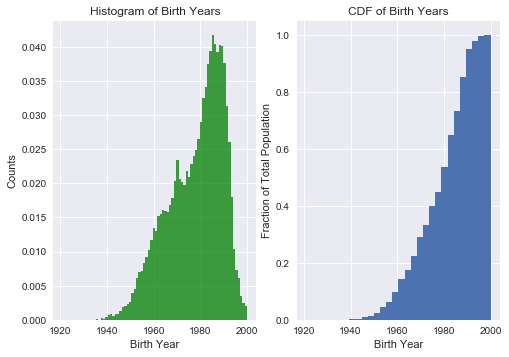

In [37]:
# the histogram of the data
ax1 = plt.subplot(1, 2, 1)
n, bins, patches = plt.hist(bike_df['birth year'][bike_df['birth year'] > 1920],
                            bins = 78,    # Tried using Freedman-Diaconis Rule... IQR is too small.
                            normed=1, facecolor='green', alpha=0.75)
plt.xlabel('Birth Year')
plt.ylabel('Counts')
plt.title('Histogram of Birth Years')
plt.grid(True)

# Plot the CDF
ax2 = plt.subplot(1, 2, 2)
plt.hist(bike_df['birth year'][bike_df['birth year'] > 1920],
         bins=30, cumulative=True, normed=True)
plt.xlabel('Birth Year')
plt.ylabel('Fraction of Total Population')
plt.title('CDF of Birth Years')
plt.grid(True)

plt.show()

Great, we can see the general distribution of the ages amongst our population. We can see that about 40% of Citibike users were born after 1980, with a steep cutoff towards the mid-90s. Let's look at the histogram by gender, now.

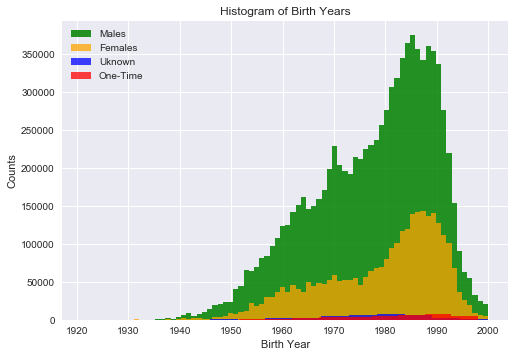

In [38]:
# Histogram by gender goes here.
plt.hist(bike_df['birth year'][(bike_df['birth year'] > 1920) & (bike_df['gender'] == 1)], 
         bins = 78,
         facecolor='green', alpha=0.85,
         label='Males')
plt.hist(bike_df['birth year'][(bike_df['birth year'] > 1920) & (bike_df['gender'] == 2)], 
         bins = 78, facecolor='orange', alpha=0.75,
         label='Females')
plt.hist(bike_df['birth year'][(bike_df['birth year'] > 1920) & (bike_df['gender'] == 0)], 
         bins = 12, facecolor='blue', alpha=0.75,
         label='Uknown')
plt.hist(bike_df['birth year'][(bike_df['birth year'] > 1920) & (bike_df['gender'] == 3)], 
         bins = 12, facecolor='red', alpha=0.75,
         label='One-Time')
plt.xlabel('Birth Year')
plt.ylabel('Counts')
plt.title('Histogram of Birth Years')
plt.legend()
plt.grid(True)

## Basic Segmentation of Customer Population
We can see a basic segmentation of the customer population with simple histograms. For the current dataset, the vast majority are males born in the 80's. There is a steep cutoff of riders born in the 90's for the entire population. On the other side of the 80's for males, there is a steep decrease in the number of riders born in the mid-80's to those born in the mid-70's and on.

## Looking at Speed
Let's take a look at a potentially interesting feature: speed.

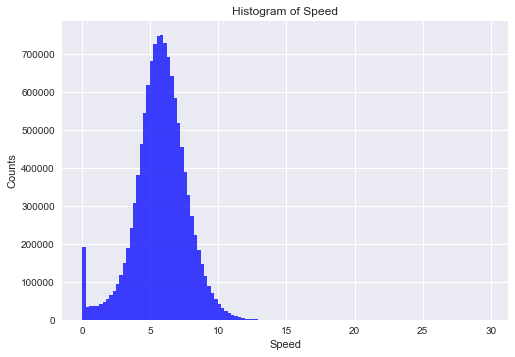

In [39]:
# Histogram of speeds

plt.hist(bike_df['speed_miles/hour'][bike_df['speed_miles/hour'] < 30], 
         bins = 120, facecolor='blue', alpha=0.75)
plt.xlabel('Speed')
plt.ylabel('Counts')
plt.title('Histogram of Speed')
plt.grid(True)


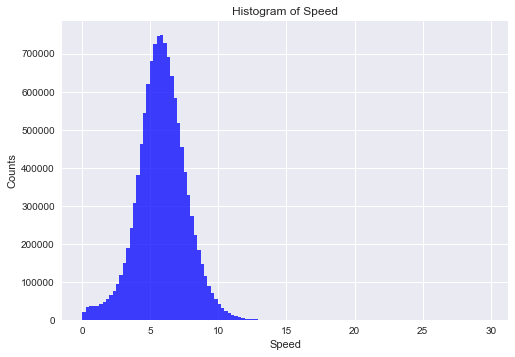

In [55]:
# Histogram of speeds, without zero
plt.hist(bike_df['speed_miles/hour'][(bike_df['speed_miles/hour'] < 30) & (bike_df['speed_miles/hour'] > 0)], 
         bins = 120, facecolor='blue', alpha=0.75)
plt.xlabel('Speed')
plt.ylabel('Counts')
plt.title('Histogram of Speed')
plt.grid(True)


We can see that a fair number of rides are zero velocity, meaning they started and ended at the same station. As well, the mean velocity is around 6 mph. This seems a bit slow, and probably is. I haven't accounted for time spent figuring out the route by the rider, or adjusting their bike after paying for it, nor have I used an appropriate distance metric. Accounting for each of those, I believe the curve could be shifted up a few mph, but at least we get a good sense of the distribution from this chart.

## Data Story: More Questions
To continue assessing the data, I will look at the following factors to see if there is an interesting trend:
1. Speed by gender and age
2. Average length of the trip by gender and age
3. Demand per day of the week
4. Demand per hour of the day

I'll go through and assess these questions in a graphical format. They will help provide intuition and insight into the time series forecasting process, especially when deciding how to forecast demand. For example, we will see if the demand for bikes is different between weekdays and weekends, and how those trends differ. We can even look at the difference in hour of the day to improve the time series forecasting model accuracy. Remember, I said that the trend is an important variable for time series analysis, and the more constant the trend, the easier it is to model future events.

In [195]:
# Average speed by each gender and age group
bike_df['age'] = 2017 - bike_df['birth year']

In [140]:
def gend_age_speed(df):
    ''' 
    Accepts the pivot tables only. Specifically the pivot tables that I just made in the previous cell.
    '''
    avg_speeds = []
    for i in range(len(df)):
        avg_speeds.append(np.sum(
            df.drop('total', axis=1).iloc[i] * df.drop('total', axis=1).iloc[i].index
        )/df.total.iloc[i])
    new_col = pd.Series(avg_speeds)
    df['avg_speed'] = new_col.values
    return df

In [154]:
# speed by gender and age -> Age on x-axis, gender two different curves(4), and mph to the left
# Average speed by each age group and then plot line graph
speed_condensed_df = bike_df[(bike_df['speed_miles/hour'] < 30) & (bike_df['speed_miles/hour'] > 0)]

male_speed_condensed_df = speed_condensed_df[speed_condensed_df['gender'] == 1]
female_speed_condensed_df = speed_condensed_df[speed_condensed_df['gender'] == 2]
other_speed_condensed_df = speed_condensed_df[speed_condensed_df['gender'] == 0]

male_age_speed_df = male_speed_condensed_df.groupby(['age','speed_miles/hour']).size()
female_age_speed_df = female_speed_condensed_df.groupby(['age','speed_miles/hour']).size()
other_age_speed_df = other_speed_condensed_df.groupby(['age','speed_miles/hour']).size()

# Fix groupby
male_age_speed_df = male_age_speed_df.reset_index('speed_miles/hour')
female_age_speed_df = female_age_speed_df.reset_index('speed_miles/hour')
other_age_speed_df = other_age_speed_df.reset_index('speed_miles/hour')

# Round up the speed to make pivot table computation easier
male_age_speed_df['speed_miles/hour'] = np.ceil(male_age_speed_df['speed_miles/hour'])
female_age_speed_df['speed_miles/hour'] = np.ceil(female_age_speed_df['speed_miles/hour'])
other_age_speed_df['speed_miles/hour'] = np.ceil(other_age_speed_df['speed_miles/hour'])

# Create pivot tables
male_age_speed_pivot = male_age_speed_df.pivot_table(values=0, index='age', columns='speed_miles/hour', aggfunc='count')
female_age_speed_pivot = female_age_speed_df.pivot_table(values=0, index='age', columns='speed_miles/hour', aggfunc='count')
other_age_speed_pivot = other_age_speed_df.pivot_table(values=0, index='age', columns='speed_miles/hour', aggfunc='count')

# Convert nans to zero
male_age_speed_pivot = male_age_speed_pivot.fillna(value=0)
female_age_speed_pivot = female_age_speed_pivot.fillna(value=0)
other_age_speed_pivot = other_age_speed_pivot.fillna(value=0)

# Create a summation column
male_age_speed_pivot['total'] = male_age_speed_pivot.sum(axis=1)
female_age_speed_pivot['total'] = female_age_speed_pivot.sum(axis=1)
other_age_speed_pivot['total'] = other_age_speed_pivot.sum(axis=1)

# Creating average speed column from average speed function
gend_age_speed(male_age_speed_pivot)
gend_age_speed(female_age_speed_pivot)
gend_age_speed(other_age_speed_pivot)

# Limit age to 65 years of age
male_age_speed_pivot = male_age_speed_pivot.loc[17:65]
female_age_speed_pivot = female_age_speed_pivot.loc[17:65]
other_age_speed_pivot = other_age_speed_pivot.loc[17:65]

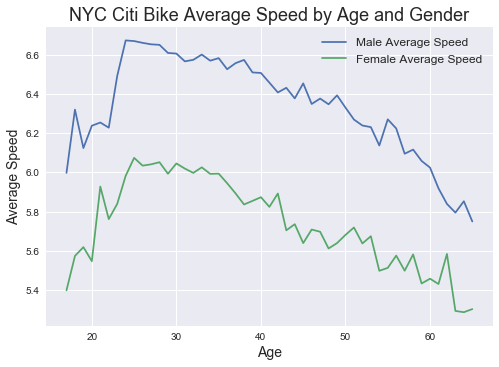

In [170]:
# We have all the data. Time to plot.
x_vals = male_age_speed_pivot.index
plt.plot(x_vals, male_age_speed_pivot.avg_speed, label='Male Average Speed')
plt.plot(x_vals, female_age_speed_pivot.avg_speed, label='Female Average Speed')
plt.legend(loc='best', fontsize=12)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Average Speed', fontsize=14)
plt.title('NYC Citi Bike Average Speed by Age and Gender', fontsize=18)
plt.show()

In [182]:
def gend_age_trip(df):
    ''' 
    Accepts the pivot tables only. Specifically the pivot tables that I just made in the previous cell.
    '''
    avg_trips = []
    for i in range(len(df)):
        avg_trips.append(np.sum(
            df.drop('total', axis=1).iloc[i] * df.drop('total', axis=1).iloc[i].index
        )/df.total.iloc[i])
    new_col = pd.Series(avg_trips)
    df['avg_trip'] = new_col.values
    return df

In [186]:
# Average length of trip by age
# Remove all values greater than 8 hours (28,800 seconds) and less than 1 second
trip_condensed_df = bike_df[(bike_df['tripduration'] < 28800) & (bike_df['tripduration'] > 1)]

# Divide by gender
male_duration_condensed_df = trip_condensed_df[trip_condensed_df['gender'] == 1]
female_duration_condensed_df = trip_condensed_df[trip_condensed_df['gender'] == 2]
other_duration_condensed_df = trip_condensed_df[trip_condensed_df['gender'] == 0]

male_age_trip_df = male_duration_condensed_df.groupby(['age','tripduration']).size()
female_age_trip_df = female_duration_condensed_df.groupby(['age','tripduration']).size()
other_age_trip_df = other_duration_condensed_df.groupby(['age','tripduration']).size()

# Fix groupby
male_age_trip_df = male_age_trip_df.reset_index('tripduration')
female_age_trip_df = female_age_trip_df.reset_index('tripduration')
other_age_trip_df = other_age_trip_df.reset_index('tripduration')

# Create pivot tables
male_age_trip_pivot = male_age_trip_df.pivot_table(values=0, index='age', 
                             columns='tripduration', aggfunc='count').fillna(value=0).astype(int)
female_age_trip_pivot = female_age_trip_df.pivot_table(values=0, index='age', 
                             columns='tripduration', aggfunc='count').fillna(value=0).astype(int)
other_age_trip_pivot = other_age_trip_df.pivot_table(values=0, index='age', 
                             columns='tripduration', aggfunc='count').fillna(value=0).astype(int)

# Create a summation column
male_age_trip_pivot['total'] = male_age_trip_pivot.sum(axis=1)
female_age_trip_pivot['total'] = female_age_trip_pivot.sum(axis=1)
other_age_trip_pivot['total'] = other_age_trip_pivot.sum(axis=1)

# Creating average speed column from average speed function
gend_age_trip(male_age_trip_pivot)
gend_age_trip(female_age_trip_pivot)
gend_age_trip(other_age_trip_pivot)

# Limit age to 65 years of age
male_age_trip_pivot = male_age_trip_pivot.loc[17:65]
female_age_trip_pivot = female_age_trip_pivot.loc[17:65]
other_age_trip_pivot = other_age_trip_pivot.loc[17:65]

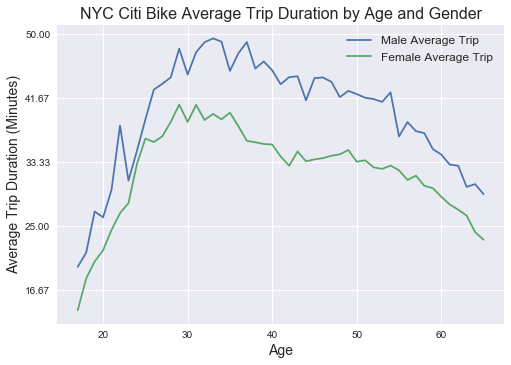

In [194]:
# We have all the data. Time to plot.
import matplotlib as mpl

fig, ax = plt.subplots()
x_vals = male_age_trip_pivot.index

def mjrFormatter(x, pos):
    return "%.2f" % (x/60)

ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(mjrFormatter))

plt.plot(x_vals, male_age_trip_pivot.avg_trip, label='Male Average Trip')
plt.plot(x_vals, female_age_trip_pivot.avg_trip, label='Female Average Trip')
plt.legend(loc='best', fontsize=12)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Average Trip Duration (Minutes)', fontsize=14)
plt.title('NYC Citi Bike Average Trip Duration by Age and Gender', fontsize=16)
plt.show()

## Time-Series Data Story
Alright, since the hard work was put into cleaning and converting this dataset's time information to panda's datetime format, let's have a look at some of the statistics of ridership during the year. To do this, I can resample the original dataframe into counts of trips by day and month, and look at interesting trends with these resampled dataframes.

I will start by assessing the number of trips per day in 2016 and then move on to the demand for bikes by month. Finally, I will look at the average demand for bikes by hour of the day for each day of the week and demand for bikes by hour of the day. In summary:
- Number of trips per day in 2016.
- Demand for bikes by month.
- Average demand for bikes by hour and day of the week.
- Demand for bikes by hour of the day.

In [199]:
# Simplify by making a univariate, total bike counts, dataframe
total_DayCounts_df = bike_df.resample('D').apply({'bikeid':'count'})
print('Number of Days (leap year!): ',len(total_DayCounts_df))
total_DayCounts_df.columns = ['ride_count']

Number of Days (leap year!):  366


In [57]:
total_HourCounts_df = bike_df.resample('H').apply({'bikeid':'count'})
print('Total Hours Bikes were Operational:',len(total_HourCounts_df))
total_HourCounts_df.columns = ['ride_count']

Total Hours Bikes were Operational: 8784


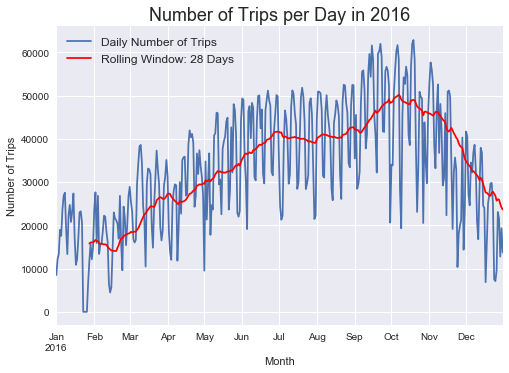

In [230]:
# Total number of rides per day
total_DayCounts_df.rename(columns={'ride_count': 'Daily Number of Trips'}).plot()
# Create the rolling class
r = total_DayCounts_df.rolling(window = 28)
r.mean()['ride_count'].plot(color='red', label='Rolling Window: 28 Days')
plt.legend(loc='best', fontsize=12)
plt.xlim(['2016-01-01 00:00:41', '2016-12-31 23:59:56'])
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Number of Trips per Day in 2016', fontsize=18)

We were able to get the number of trips per day  in the citibike system by resampling the original dataframe and aggregating by the number of counts. Next, I want to plt the monthly number of rides. I can do this in two ways. One, the same as before, which is just resampling the entire dataset and counting the number of trips in a month, or using the previous, day-sampled, dataset and using a rolling window of 28 days to collect the average number of rides per month. While the resampling by month is the more straightforward option, I want to do this in order to show a difference between resampling and using a rolling window with the 

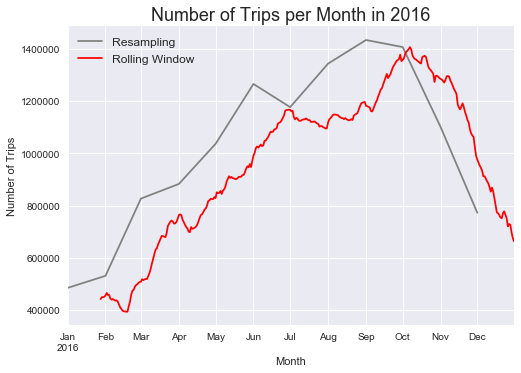

In [231]:
# plot of resampled versus rolling window of 28 days.
# regular resampling method
bike_df.resample('M').apply({'bikeid':'count'}).rename(columns={'bikeid': 'Resampling'}).plot(color='gray')
# Created a rolling class. Window uses 28 data points. Using total count now.
r.sum()['ride_count'].plot(color='red', label='Rolling Window')
plt.legend(loc='best', fontsize=12)
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Number of Trips per Month in 2016', fontsize=18)

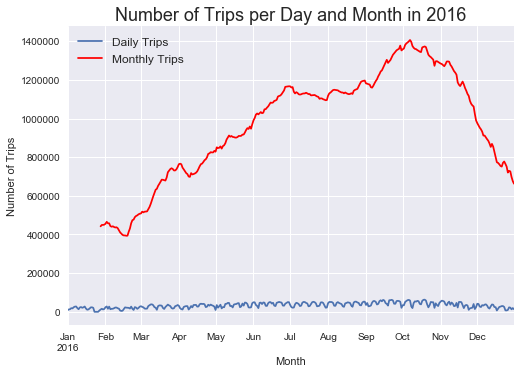

In [214]:
#Superimpose the monthly rolling window on the daily window
total_DayCounts_df.rename(columns={'ride_count': 'Daily Trips'}).plot()
r.sum()['ride_count'].plot(color='red', label='Monthly Trips')
plt.legend(loc='best', fontsize=12)
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Number of Trips per Day and Month in 2016', fontsize=18)

## Comparison of Resampling and Rolling Windows

The rolling window function returns a much nicer, and smooth, function that I can use to assess the time series traits of this dataset. The resampling method of plotting the monthly was much more discrete, as should be expected, but it had a similar overall trend.

Just for fun, I wanted to compare the rolling monthly window to the daily total counts time series. This really demonstrates the effect of choosing what type of time period to choose for your time series analysis. The monthly aggregate contains the overall trend seen in the daily ride count time series from earlier, gradually increasing from January until peaking in October, and then steeply falling back off in November and December. 

After the fact, it makes sense, but I was able to use one rolling class function to relate the total number of rides per day and per month by applying a different summary statistic. For the rides per day, the mean of the rolling window helped to find a smooth trend of the daily number of bike rides, while the count function was able to relate the monthly number of rides. The last plot shows the large difference in this choice, relating the count of the rolling window to the total number of rides per day.

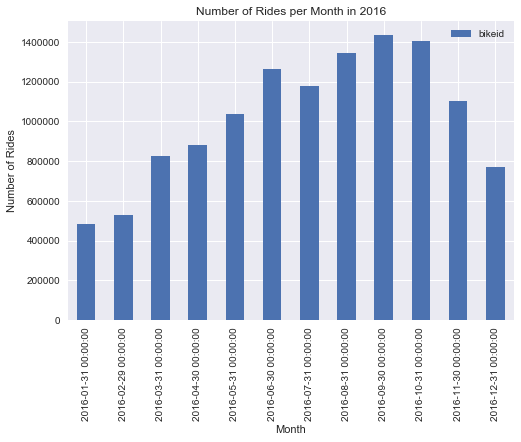

In [44]:
# Total number of rides per month
bike_df.resample('M').apply({'bikeid':'count'}).plot(kind='bar')
plt.ylabel('Number of Rides')
plt.xlabel('Month')
plt.title('Number of Rides per Month in 2016')
# I need to add ticks to y-axis later for readability

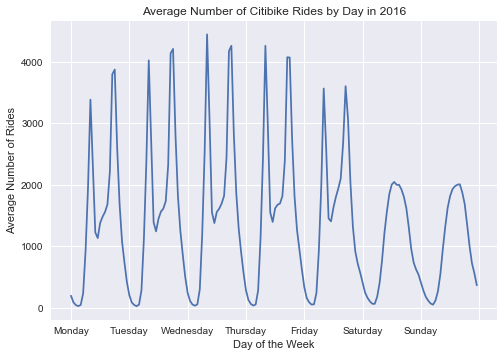

In [45]:
# By day of the week
total_HourCounts_df['week'] = total_HourCounts_df.index.week
total_HourCounts_df['week_beginning'] = total_HourCounts_df.index.to_period('W').to_timestamp()
total_HourCounts_df['week_time'] = total_HourCounts_df.index.to_series() - total_HourCounts_df['week_beginning']

# Create a pivot table that has the weeks in columns and hour of each day of the week in rows
HrCount_pivot = total_HourCounts_df.pivot_table(values='ride_count', index='week_time', columns='week')
 
# Mean number of bike rides per hour of the day, by day of the week
# Add some titles and axis labels!
fig, ax = plt.subplots()
ax.plot_date(HrCount_pivot.index, HrCount_pivot.mean(axis=1), marker='', linestyle='-')

labels = [item.get_text() for item in ax.get_xticklabels()]
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.ylabel('Average Number of Rides')
plt.xlabel('Day of the Week')
plt.title('Average Number of Citibike Rides by Day in 2016')
 
ax.set_xticklabels(labels)
plt.show()

The difference in trend between the weekday and the weekend is interesting in that the problem of predicting the number of bikes at each station will probably be different on the weekend than on the weekday. As well, the stations that are popular during the week may not be as popular on the weekend.

In fact, I will separate the weekday from the weekend, because the seasonality, trend, and average level of activity are much different on the weekdays than on the weekend.

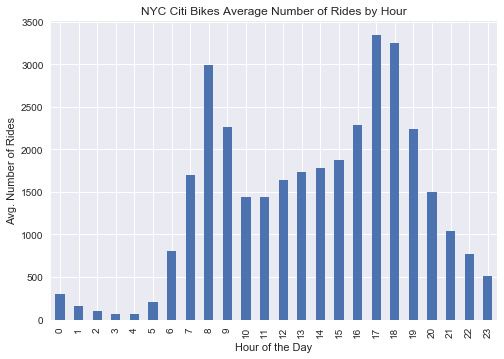

In [46]:
# By hour of the day
total_HourCounts_df.ride_count.groupby(total_HourCounts_df.index.hour).mean().plot(kind='bar')
plt.ylabel('Avg. Number of Rides')
plt.xlabel('Hour of the Day')
plt.title('NYC Citi Bikes Average Number of Rides by Hour')

## Plotting Overall Time Series
Great, we have a general idea of when, during the day, the week, and over the year, when Citibikes are most used. This helps to give an overall idea of when the bikes are in highest demand and gives some direction about the seasonality and trends for demand of bikes over the year. This will help us create a forecast of demand to improve the Citibike scheme. 

~~One problem that Citibike has is with the amount of bikes at each station. For example, some stations do not have enough bikes during the day and others are over-crowded, not allowing customers to park their bikes at the location which they would like to end their journey. Both congestion and scarcity should be avoided if possible. In order to avoid these two scenarios, it would be most helpful to predict the number of bikes that will be present at the station in the next few hours, days, weeks, and months.~~

We can use some of the insights from before to steer our thinking, but it is most likely that each of these graphs will vary by each station. It would be impossible to manually run through these charts and try to predict which station will run out of bikes or will be full of bikes, soon.

## Segmentation by Station
To get an idea of these trends, I'll isolate the top-3, bottom-3, and random-3 stations with the highest rate of daily bicycles leaving and plot their time series trends. From there, I'll construct a time series forecast for each station using half of the year's data.

It's important to note that this is only half of the problem. This will be looking at the rate of bicycles leaving a station and not at the rate of bicycles arriving, for now.

In [47]:
# Sort the mean number of bikes leaving per day by station
bike_df['date'] = bike_df.index.date
start_station_df = bike_df.groupby(['date', 'start station id']).size()
start_station_df = start_station_df.reset_index('start station id')
start_station_df = start_station_df.rename(columns={0: "rides_leaving"})
start_station_df.head()

,start station id,rides_leaving
date,,
2016-01-01,72,19
2016-01-01,79,15
2016-01-01,82,10
2016-01-01,83,14
2016-01-01,116,39


In [48]:
start_station_pivot = start_station_df.pivot_table(values='rides_leaving', index='date', columns='start station id')
start_station_pivot = start_station_pivot.fillna(value=0).astype(int)
# Mean number of rides leaving throughout the year
start_station_vector = start_station_pivot.mean(axis=0).sort_values(ascending=False)
print(start_station_vector.head(3))
print('')
print(start_station_vector.tail(3))

start station id
519    392.577348
435    266.842541
402    252.118785
dtype: float64

start station id
3014    0.008287
294     0.005525
3385    0.002762
dtype: float64


In [49]:
start_station_vector[3:-3].sample(n=3)

start station id
436      12.008287
3332      2.781768
470     110.129834
dtype: float64

In [50]:
df.index = pd.to_datetime(df.index)

52.17881739011991
460


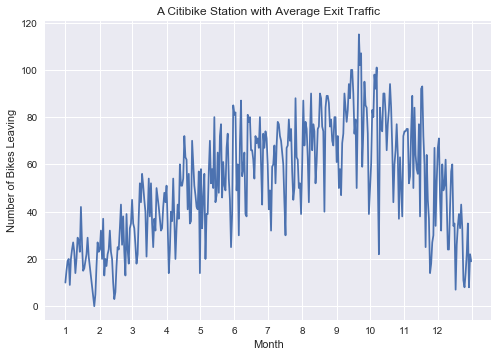

In [197]:
from matplotlib.dates import MonthLocator
# Average station
print(start_station_vector.mean())
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return idx
print(find_nearest(start_station_vector, start_station_vector.mean()))  # This is station number

fig, ax = plt.subplots()

ax.plot_date(start_station_pivot.index,
             start_station_pivot[find_nearest(start_station_vector, start_station_vector.mean())],
             marker='', linestyle='-')

labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
mloc = MonthLocator()
ax.xaxis.set_major_locator(mloc)
ax.set_xticklabels(labels)

#plt.setp(xticklabels=labels)
plt.ylabel('Number of Bikes Leaving')
plt.xlabel('Month')
plt.title('A Citibike Station with Average Exit Traffic')

Ok, so these are the nine stations that I will evaluate first. I'll look at the number of bikes leaving per day and create a time series of that type of data (if I can). This data is related to the number of bikes that left a station in a day. I'm not sure if I'll be able to forecast from this type of data... But we'll see tomorrow.

In [52]:
# Plot time series for top, bottom, and random (3x3 big chart)
short_df = start_station_pivot[[519, 435, 402, 3014, 294, 3385, 3424, 363, 3355]]

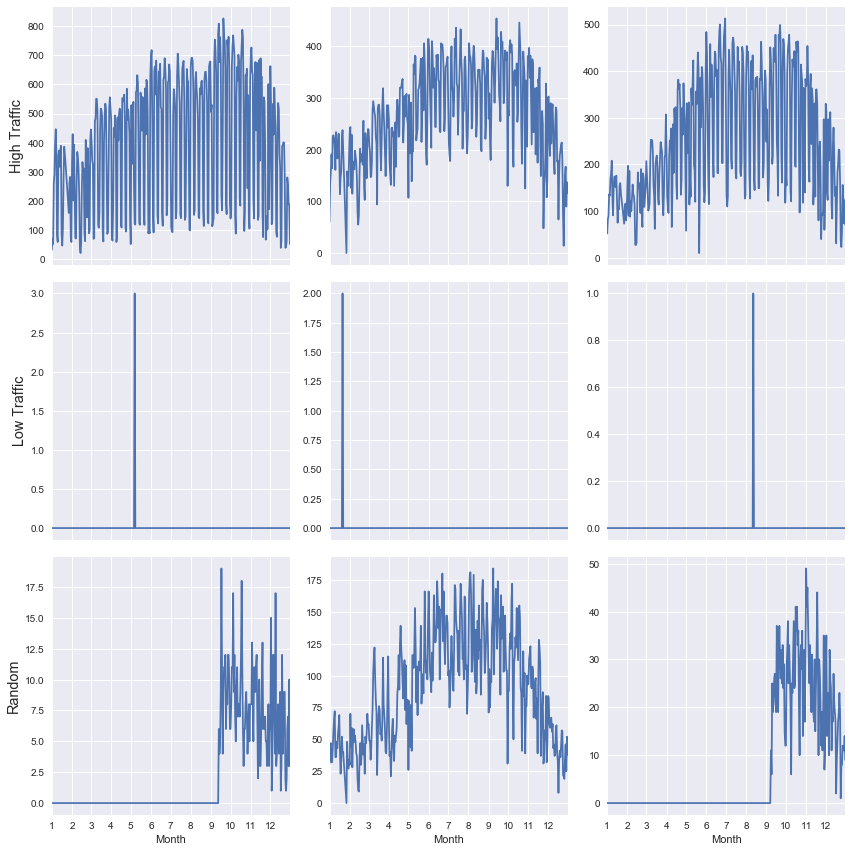

In [53]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12), sharex=True)

rows = ['High Traffic', 'Low Traffic', 'Random']

labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

plt.setp(axes, xticklabels=labels)

short_df[519].plot(ax=axes[0,0])
short_df[435].plot(ax=axes[0,1])
short_df[402].plot(ax=axes[0,2])
short_df[3014].plot(ax=axes[1,0])
short_df[294].plot(ax=axes[1,1])
short_df[3385].plot(ax=axes[1,2])
short_df[3424].plot(ax=axes[2,0])
short_df[363].plot(ax=axes[2,1])
short_df[3355].plot(ax=axes[2,2])

for i, row in enumerate(axes):
    for j, cell in enumerate(row):
        if i == len(axes) - 1:
            cell.set_xlabel("Month")

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation=90, size='large')
    
#fig.suptitle("Title centered above all subplots", fontsize=16)
fig.tight_layout()


After plotting three of the top, bottom, and randomly selected traffic leaving a station, we can see that the top three have similar traffic trends, but possibly not the same for analyzing the time series of each. That said, I will have to create a pipeline that finds the trends for each individual station and then forecast the number of bikes that will be leaving that station in the next month or week.

The low traffic stations have a peak of one or two bikes leaving the station in a year. It doesn't make sense why this station should even be in existence, but maybe these are placeholders for another important underlying process for Citibikes?

The randomly selected stations showcase two stations that do not have activity until September, and one that looks similar to an average station (plotted previously). 

Now, I'm curious about the number of bikes accumulated at each station, which will be the number of bikes leaving a station minus the number of bikes arriving at a station that day. I'll call this variable the 'daily net rides', which is just the number of bikes arriving at a station minus the number of bikes leaving the station.

In [60]:
# Ensuring station id corresponds uniquely to station names
bike_df.head(1)

,bikeid,birth year,end station id,end station latitude,end station longitude,end station name,gender,start station id,start station latitude,start station longitude,start station name,stoptime,tripduration,usertype,distance_miles,velocity_miles/hour,speed_miles/hour,date
starttime,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:41,22285,1958,3002,40.711512,-74.015756,South End Ave & Liberty St,1,268,40.719105,-73.999733,Howard St & Centre St,2016-01-01 00:16:04,923,Subscriber,0.990185,3.862044,3.862044,2016-01-01


In [64]:
print(len(bike_df['end station name'].unique()))
print(len(bike_df['end station id'].unique()))
print(len(bike_df['start station name'].unique()))
print(len(bike_df['start station id'].unique()))

673
669
653
649


Just checking on the number of station ids and names, it appears that the ids map to more station names, which I'm guessing is due to stations with slightly different names from combining the two differently formatted csv files. Instead of worrying about the format of the names, I'll stay with the unique station ids.

In [54]:
# Creating Daily Net Rides DF
end_station_df = bike_df.groupby(['date', 'end station id']).size()
end_station_df = end_station_df.reset_index('end station id')
end_station_df = end_station_df.rename(columns={0: "rides_arriving"})

# Creating the pivot table
end_station_pivot = end_station_df.pivot_table(values='rides_arriving', index='date', columns='end station id')
end_station_pivot = end_station_pivot.fillna(value=0).astype(int)

# Matching columns
col_matches = [col for col in end_station_pivot.columns if col in start_station_pivot.columns]

# Create net daily rides df
netdaily_rides_pivot = end_station_pivot[col_matches] - start_station_pivot[col_matches]

## Data Analysis - Inferential Statistics
There are time series techniques that can be performed on each to retrieve the following components of the time series. These are important aspects of each time series that I will investigate:
- Level
- Trend
- Seasonality
- Noise

I'll start by assessing the aforementioned qualities on the total demand. This will be a nice introduction to the techniques that I'll be using and how I'll be using them on a more refined scale for each individual station, later. ~~demand per station, which is, how many bikes are leaving a station per day or month. To do by day is to have the foundations for the monthly calculation. Since creating ARIMA models requires ~~

We need a stationary time series before we can perform any type of forecasting. These components are necessary for forecasting:
- LIST OUT THE NECESSARY REQUIREMENTS from AILEEN NIELSEN'S TALK